Solving 1D - Diffusion problem using FTCS, BTCS , Crank-Nicolson

Actual Solution and Approximate Solution 
### Rahul M N - PH17B009

In [1]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [2]:
def erf(x, t):
    return special.erfc(x / ((2 * np.sqrt(1 * t))+0.001))

In [3]:
 # Constants
x_n = 1
k = 100
n = 20000
dx = 0.02
dt = 0.5*(dx**2)
alp = dt / (dx**2)

In [4]:
# Matrices
a = np.zeros(k-2)
b = np.zeros(k-1)
c = np.zeros(k-2)
u_n_exp = np.zeros(k-1)
u_ni = np.zeros(k-1)
u_n_imp = np.zeros(k-1)
u_nc = np.zeros(k-1)
u_n_crank = np.zeros(k-1)
u_n_gg = np.zeros(k-1)
exact = np.zeros(n+1)

In [5]:
# Boundaries
u_n_gg[0] = 1
exact[0] = 1
j = 0

In [6]:
# Prepare for Diag
for i in range(0, k-1):
   b[i] = 2
for i in range(0, k-2):
   a[i] = -1
   c[i] = -1

In [7]:
# Numpy Diag, Identity setup
B = (np.diag(b, k=0) + np.diag(a, k=-1) + np.diag(c, k=1))
I = np.eye(k-1)

In [8]:
 # Calculate approximation
i = 0
 while i <= 1:
    exact[j] = erf(x_n, i)
    u_n_gg[k-2] = exact[j]
    
    # Explicit
    u_n_exp = np.dot((I - np.dot(alp, B)), (u_n_exp)) + np.dot(alp, u_n_gg)
    ue = u_n_exp
    explicit = ue
     
    # Implicit
    u_n_imp = (np.dot(np.linalg.inv(I + np.dot(alp, B)) , (u_ni) + np.dot(alp, u_n_gg)))
    u_ni = u_n_imp
    implicit = u_n_imp
      
    # Crank-Nicolson
    p1 = np.dot((np.dot(2,I) - np.dot(alp, B)), u_nc) + 2*np.dot(alp, u_n_gg)
    p2 = np.linalg.inv(np.dot(2,I) + np.dot(alp, B))
    u_n_crank = np.dot(p1, p2)
    u_nc = u_n_crank
    crank = u_n_crank
        
    j += 1
    i += dt

In [9]:
# Plotting and Formatting
x = np.linspace(0, 1, k-1)

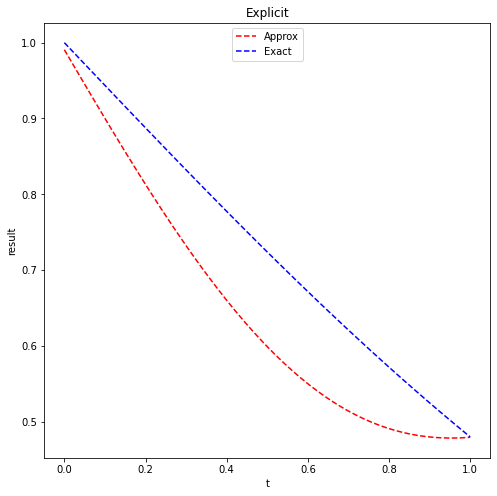

In [10]:
# Explicit Plot
plt.plot(x, explicit, 'r--')
plt.plot(x, erf(x, 1), 'b--')
plt.title("Explicit")
plt.xlabel("t")
plt.ylabel("result")
plt.legend(['Approx', 'Exact'], loc='upper center')

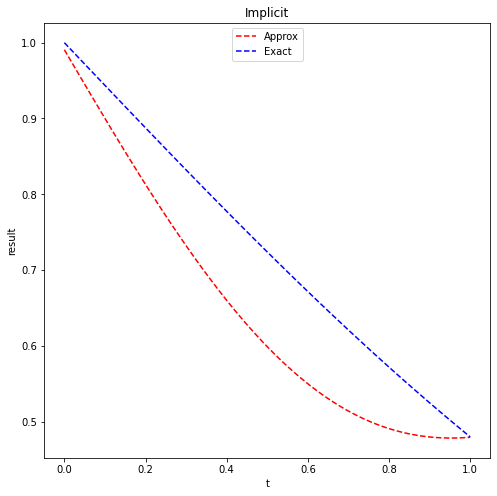

In [11]:
# Implicit Plot
plt.plot(x, implicit, 'r--')
plt.plot(x, erf(x, 1), 'b--')
plt.title("Implicit")
plt.xlabel("t")
plt.ylabel("result")
plt.legend(['Approx', 'Exact'], loc='upper center')

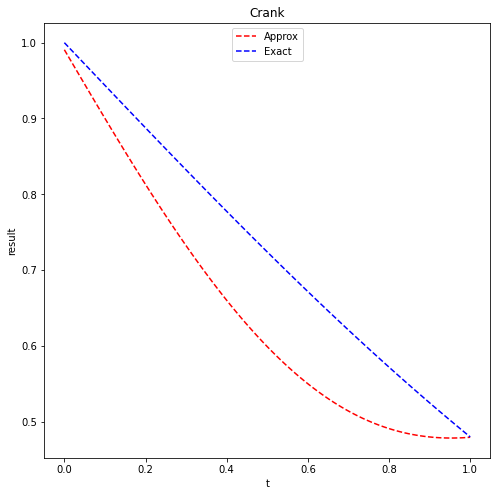

In [12]:
# Crank-Nicolson Plot
plt.plot(x, crank, 'r--')
plt.plot(x, erf(x, 1), 'b--')
plt.title("Crank")
plt.xlabel("t")
plt.ylabel("result")
plt.legend(['Approx', 'Exact'], loc='upper center')
plt.show()
    